In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def read_file(filename):
    with open("data/data grid searches/" + filename, "r") as file:
        # ----------- Extract metadata ------------------    
        first_line = file.readline()  # Read first line with metadata
        n_particles, n_timepoints = map(int, first_line.split()) # Split first line
        
        #print(f"Filename: {filename}")
        #print(f'n_particles: {n_particles} \nn_timepoints: {n_timepoints} \n')
        # -----------------------------------------------

        t = np.zeros(n_timepoints)
        r = np.zeros((n_particles, n_timepoints, 3))
        v = np.zeros((n_particles, n_timepoints, 3))
        
        i = 0 # time-index
        j = 0 # particle-index

        for line in file:
            word = line.split()

            if len(word[:]) == 1: #------- Time - line
                t[i] = np.float64(word[0])
                j = 0
                i += 1

            else: #----------------------- Particles - lines
                r[j,i-1,:] = np.float64(np.array( [word[0],word[1],word[2]] ))
                v[j,i-1,:] = np.float64(np.array( [word[3],word[4],word[5]] ))
                j += 1

    return t, r, v, n_particles

In [3]:
f_list = np.array([0.1, 0.4, 0.7])#np.linspace(0.1, 0.7, 3)
w_v_list = w_v_list = np.array([0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 
                     0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58,
                     0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 
                     0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98,
                     "1", 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18,
                     1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38,
                     1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58,
                     1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78,
                     1.8, 1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98,
                     "2", 2.02, 2.04, 2.06, 2.08, 2.1, 2.12, 2.14, 2.16, 2.18,
                     2.2, 2.22, 2.24, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38,
                     2.4, 2.42, 2.44, 2.46, 2.48, 2.5])

# make all entries into str 
w_v_list = w_v_list.astype(str)
#np.linspace(0.2, 2.50, 115)

trapped = [] #np.zeros(len(f_list) * len(w_v_list))
#i = 0

for f in f_list:
    for w_v in w_v_list:
        filename = f"no_int_f_{f}_w_v_{w_v}_.txt"
        t, r, v, n_particles = read_file(filename)  # Assuming this function reads the file correctly

        particles = np.zeros(n_particles)  # Array to track trapped particles (0 = outside)
        for n in range(n_particles): 
            # Check if |r(t_max)| <= d (distance threshold)
            if np.linalg.norm(r[n, :]) <= 500.0:
                particles[n] = 1  # Particle is trapped inside

        diction = {"f": f, "w_v": w_v, "trapped": np.sum(particles)}
        trapped.append(diction)
        #i += 1  # Increment index for trapped array

In [4]:
# Create a dictionary with the data
data = {"f": [], "w_v": [], "trapped": []}
for entry in trapped:
    data["f"].append(entry["f"])
    data["w_v"].append(entry["w_v"])
    data["trapped"].append(entry["trapped"])

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

df_pivot = df.pivot("f", "w_v", "trapped")

/var/folders/7v/5hgy8rx53wx807_53t1p9dsc0000gn/T/ipykernel_33454/3467448067.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df.pivot("f", "w_v", "trapped")


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/7v/5hgy8rx53wx807_53t1p9dsc0000gn/T/ipykernel_33454/2453175366.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Heatmap of number of trapped particles after 500 $\mu$s", fontsize=18)


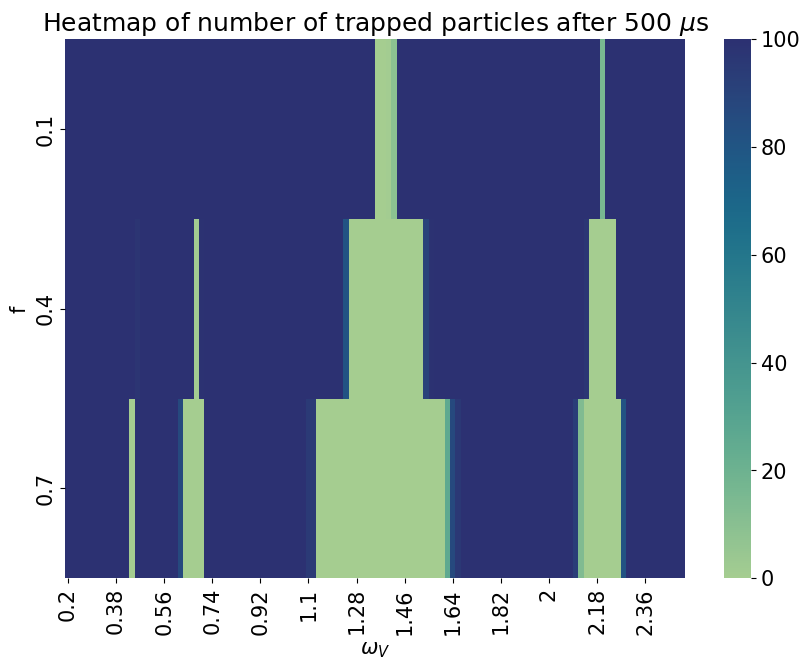

In [5]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_pivot, annot=False, cmap="crest")
plt.title("Heatmap of number of trapped particles after 500 $\mu$s", fontsize=18)
plt.xlabel(r"$\omega_V$", fontsize=15)
plt.ylabel("f", fontsize=15)

# Adjust x and y ticks to 15 fontsize
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Adjust number of ticks on x and y axes
plt.locator_params(axis='x', nbins=15)
plt.locator_params(axis='y', nbins=10)

# Adjust colorbar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.savefig("plots/heatmap_trapped_particles.png")
plt.show()


In [6]:

#time evolution trapped particles: 
all_particles = []
# # ----------------- Plot time evolution -------------------

w_file = np.array([0.67, 0.68, 0.69, 0.7, 0.71])
for w in w_file:
    t, r, v, n_particles = read_file(f"int_f_0.4_w_v_{w}_.txt")
    t = t[0:51]
    trapped = np.zeros(len(t))
    for i_t in range(len(t)):
        particles = np.zeros(n_particles)  # 0 = outside
        for n in range(n_particles): 
            # check if |r(t_max)| <= d 
            if np.linalg.norm(r[n, i_t, :]) <= 500.0:
                particles[n] = 1       # 1 = trapped inside
        trapped[i_t] = sum(particles)
    all_particles.append(trapped)


<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/var/folders/7v/5hgy8rx53wx807_53t1p9dsc0000gn/T/ipykernel_33454/127338857.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, all_particles[i], label=f"$\omega_v = {w}$")


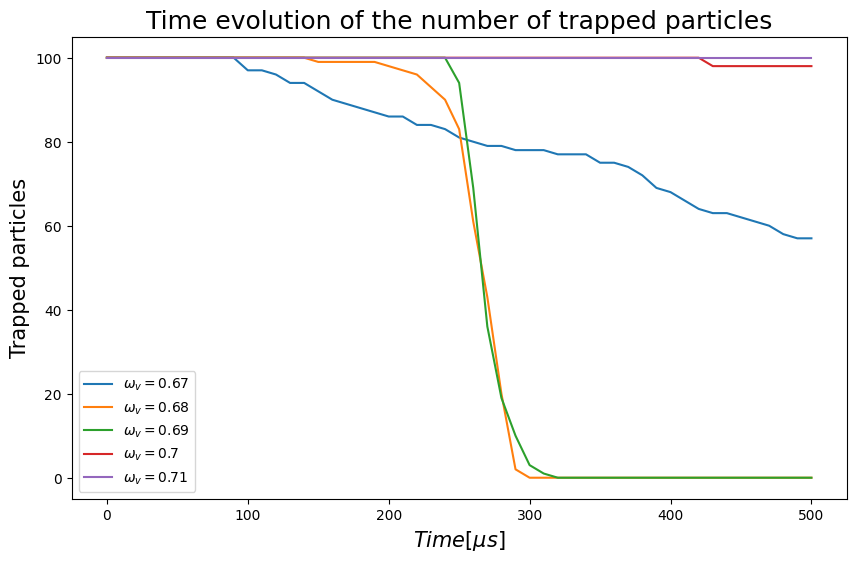

In [7]:
# plot one line per w_v
plt.figure(figsize=(10, 6))

for i, w in enumerate(w_file):
    plt.plot(t, all_particles[i], label=f"$\omega_v = {w}$")

plt.xlabel(r"$Time [\mu s]$", fontsize=15)
plt.ylabel("Trapped particles", fontsize=15)
plt.title("Time evolution of the number of trapped particles", fontsize=18)
plt.legend()
plt.savefig("plots/time_evolution_trapped_particles1.png")
plt.show()

In [8]:

#time evolution trapped particles: 
all_particles = []
# # ----------------- Plot time evolution -------------------

w_file = np.array([2.22, 2.21, 2.22, 2.23, 2.24, 2.25, 2.26])
for w in w_file:
    t, r, v, n_particles = read_file(f"int_f_0.4_w_v_{w}_.txt")
    t = t[0:51]
    trapped = np.zeros(len(t))
    for i_t in range(len(t)):
        particles = np.zeros(n_particles)  # 0 = outside
        for n in range(n_particles): 
            # check if |r(t_max)| <= d 
            if np.linalg.norm(r[n, i_t, :]) <= 500.0:
                particles[n] = 1       # 1 = trapped inside
        trapped[i_t] = sum(particles)
    all_particles.append(trapped)

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/var/folders/7v/5hgy8rx53wx807_53t1p9dsc0000gn/T/ipykernel_33454/2398296345.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, all_particles[i], label=f"$\omega_v = {w}$")


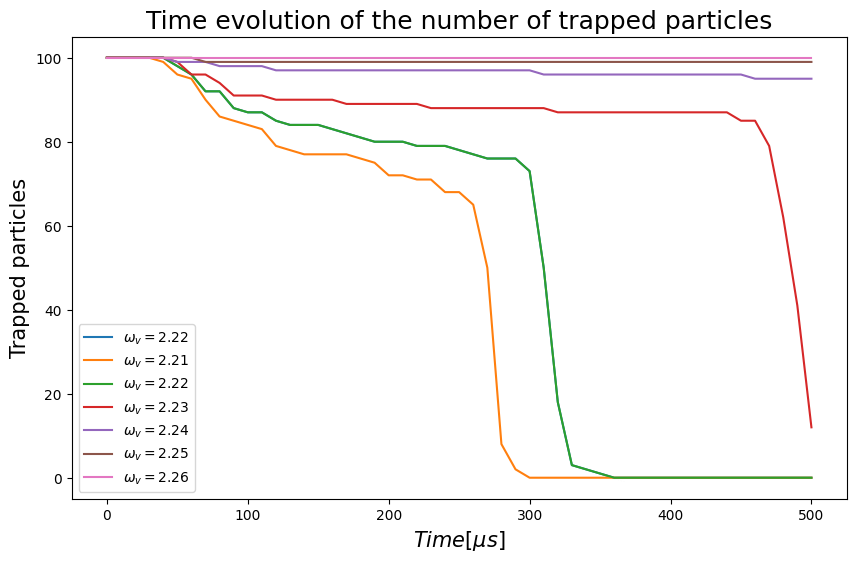

In [9]:
# plot one line per w_v
plt.figure(figsize=(10, 6))

for i, w in enumerate(w_file):
    plt.plot(t, all_particles[i], label=f"$\omega_v = {w}$")

plt.xlabel(r"$Time [\mu s]$", fontsize=15)
plt.ylabel("Trapped particles", fontsize=15)
plt.title("Time evolution of the number of trapped particles", fontsize=18)
plt.legend()
plt.savefig("plots/time_evolution_trapped_particles2.png")
plt.show()

In [10]:
# for t = 45.6, plot the value of norm(r) for each particle
slicet = int(24.7/0.01)
outside_particles = []
for n in range(n_particles):
    if np.linalg.norm(r[n, slicet, :]) >= 500.0:
        print(f"Particle {n}: |r(t)| = {np.linalg.norm(r[n, slicet, :])}")
        outside_particles.append(n)

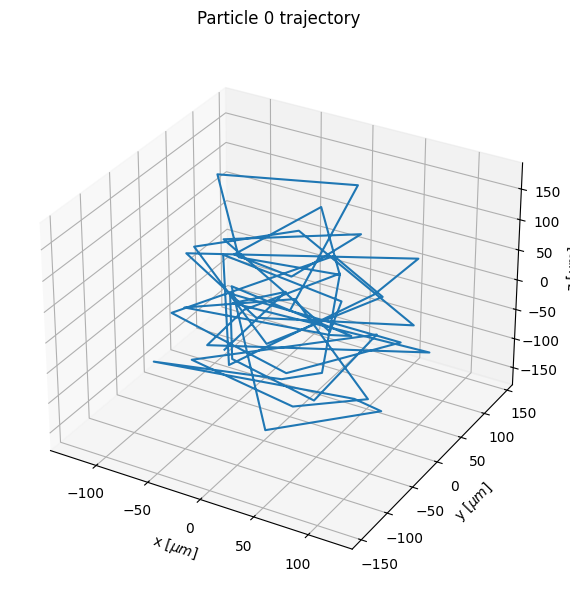

In [11]:
# plot one partcle's trajectory in 3D
idx = 0
stop = -1
fig = plt.figure(figsize=(6, 6))
fig.suptitle(f"Particle 0 trajectory")
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(r[idx, :stop, 0], r[idx, :stop, 1], r[idx, :stop, 2])

ax.set_xlabel(r"x $[\mu m]$")
ax.set_ylabel(r"y $[\mu m]$")
ax.set_zlabel(r"z $[\mu m]$")
plt.tight_layout()
plt.grid()
plt.show()

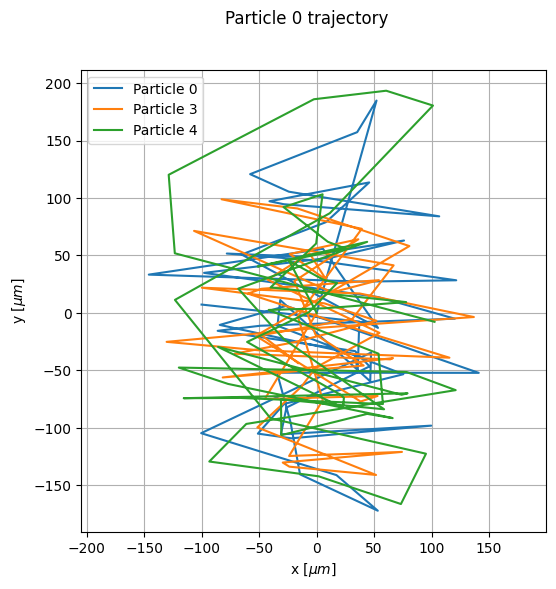

In [12]:
idx_list = [0,3,4]
start =0#int(0/0.01)
stop = -1#int(220/0.01)

fig = plt.figure(figsize=(6, 6))
fig.suptitle(f"Particle 0 trajectory")
ax = fig.add_subplot(1, 1, 1)
#ax.plot(r[idx, start:stop, 0], r[idx, start:stop, 1])

for idx in idx_list:
    ax.plot(r[idx, start:stop, 1], r[idx, start:stop, 2], label=f"Particle {idx}")

#spot circle with radius 500
circle = plt.Circle((0, 0), 500, color='r', fill=False)
ax.add_artist(circle)

ax.set_xlabel(r"x $[\mu m]$")
ax.set_ylabel(r"y $[\mu m]$")

plt.legend()
# equal axis
plt.axis('equal')

plt.grid()
plt.show()